<a href="https://colab.research.google.com/github/CamiloRios11/Senalesysistemas/blob/main/Ejercicios_SLIT_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Transformada de Laplace:

**Pregunta 1:**
Consultar y realizar los ejercicios propuestos en el cuaderno
de Colab Convolución.

**Solucion:**
El cuaderno resuelto se encuentra en el siguiente link:
https://github.com/CamiloRios11/Senalesysistemas/blob/main/Ejercicio%20Convolucion.ipynb

**Pregunta 2:**
Consultar y realizar los ejercicios propuestos en el cuaderno
de Colab Respuesta impulso.

**Solucion:**
El cuaderno resuelto se encuentra en el siguiente link:
https://github.com/CamiloRios11/Senalesysistemas/blob/main/Ejercicios%20Respuesta_Impulso.ipynb

**Pregunta 3:**
Demuestre si los siguientes sistemas de la forma $y = H{x}$,
son sistemas lineales e invariantes en el tiempo (SLIT) (simule
los sistemas en Python):
$$ y[n] = x[n]/3 + 2x[n − 1] − y[n − 1].$$

$$y[n] =
Pn
k=−∞ x2[k].$$
$$y[n] = median(x[n])$$; donde median es la funcion mediana
sobre una ventana de tamaño 3.
$$y(t) = Ax(t) + B; A,B ∈ R.$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Eje temporal
n = np.arange(0, 30)
n0 = 3  # desplazamiento para invariancia

# Señales base
x1 = np.sin(0.2 * np.pi * n)
x2 = np.heaviside(n - 5, 1.0)
a1, a2 = 2, -1
x_comb = a1 * x1 + a2 * x2

# Función para graficar
def graficar(n, y1, y2, titulo, label1="y_combinada", label2="a1*y1 + a2*y2"):
    plt.figure(figsize=(10, 4))
    plt.plot(n, y1, label=label1)
    plt.plot(n, y2, '--', label=label2)
    plt.title(titulo)
    plt.xlabel("n")
    plt.grid(True)
    plt.legend()
    plt.show()


**Sistema 1**


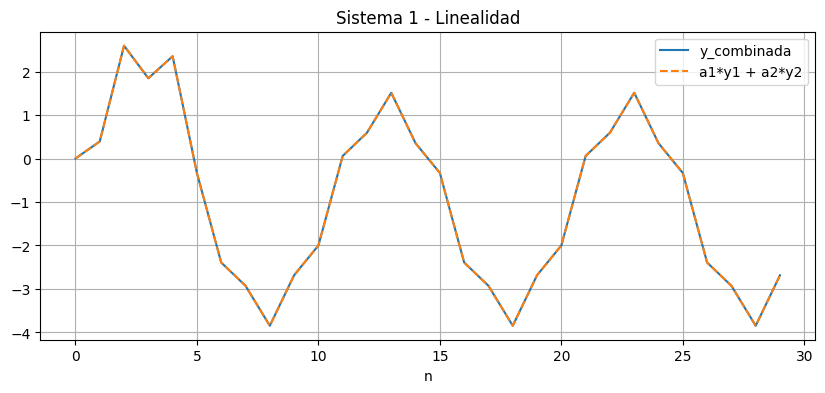

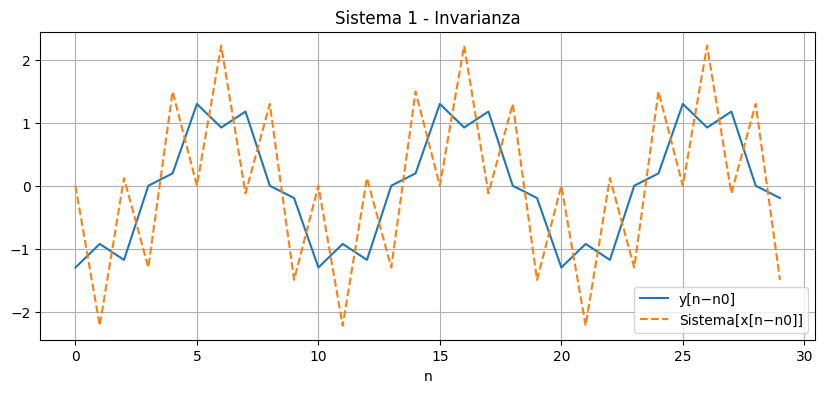

In [3]:
def sistema1(x):
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = x[i]/3 + 2*x[i-1] - y[i-1]
    return y

# Verificación de linealidad
y1_1 = sistema1(x1)
y2_1 = sistema1(x2)
y_comb_1 = sistema1(x_comb)
y_lin_1 = a1*y1_1 + a2*y2_1
graficar(n, y_comb_1, y_lin_1, "Sistema 1 - Linealidad")

# Verificación de invarianza
x_shift = np.roll(x1, n0)
y_orig = sistema1(x1)
y_shift = sistema1(x_shift)
graficar(n, np.roll(y_orig, n0), y_shift, "Sistema 1 - Invarianza", "y[n−n0]", "Sistema[x[n−n0]]")


Es SLIT ya que se demuestra que es lineal e invariable en el tiempo

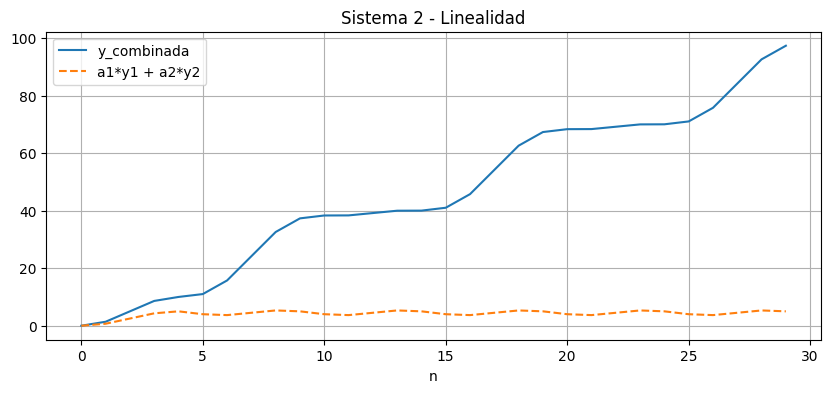

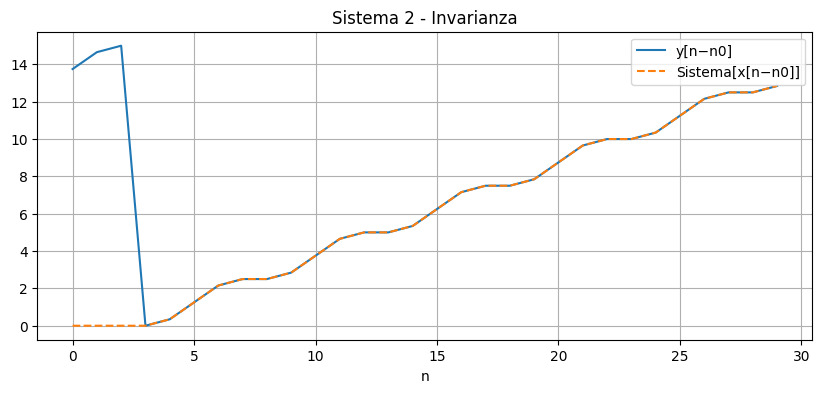

In [4]:
def sistema2(x):
    return np.cumsum(x**2)

# Verificación de linealidad
y1_2 = sistema2(x1)
y2_2 = sistema2(x2)
y_comb_2 = sistema2(x_comb)
y_lin_2 = a1*y1_2 + a2*y2_2
graficar(n, y_comb_2, y_lin_2, "Sistema 2 - Linealidad")

# Verificación de invarianza
x_shift = np.roll(x1, n0)
x_shift[:n0] = 0  # Relleno con ceros
y_orig = sistema2(x1)
y_shift = sistema2(x_shift)
graficar(n, np.roll(y_orig, n0), y_shift, "Sistema 2 - Invarianza", "y[n−n0]", "Sistema[x[n−n0]]")


No es es SLIT, ya que las graficas demuestran que no es lineal y ademas es variable en el tiempo

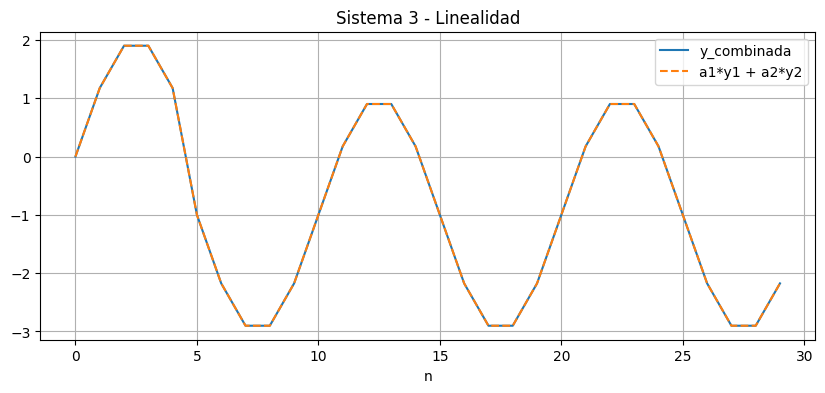

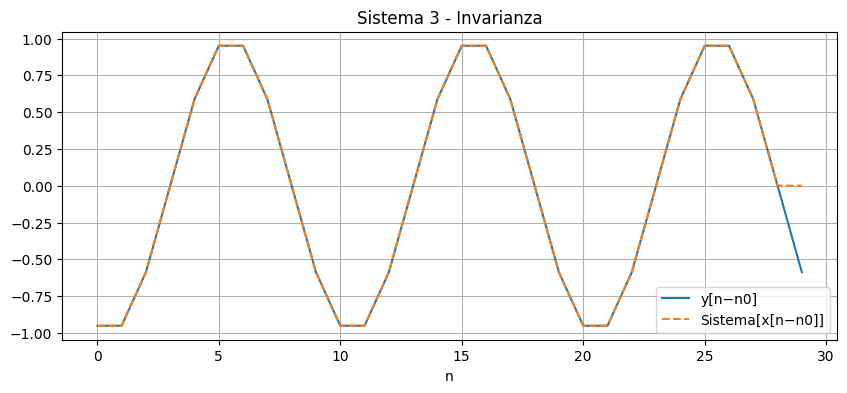

In [5]:
def sistema3(x):
    return medfilt(x, kernel_size=3)

# Verificación de linealidad
y1_3 = sistema3(x1)
y2_3 = sistema3(x2)
y_comb_3 = sistema3(x_comb)
y_lin_3 = a1*y1_3 + a2*y2_3
graficar(n, y_comb_3, y_lin_3, "Sistema 3 - Linealidad")

# Verificación de invarianza
x_shift = np.roll(x1, n0)
y_orig = sistema3(x1)
y_shift = sistema3(x_shift)
graficar(n, np.roll(y_orig, n0), y_shift, "Sistema 3 - Invarianza", "y[n−n0]", "Sistema[x[n−n0]]")


No es SLIT ya que segun las graficas es lineal, sin embargo es variable en el tiempo

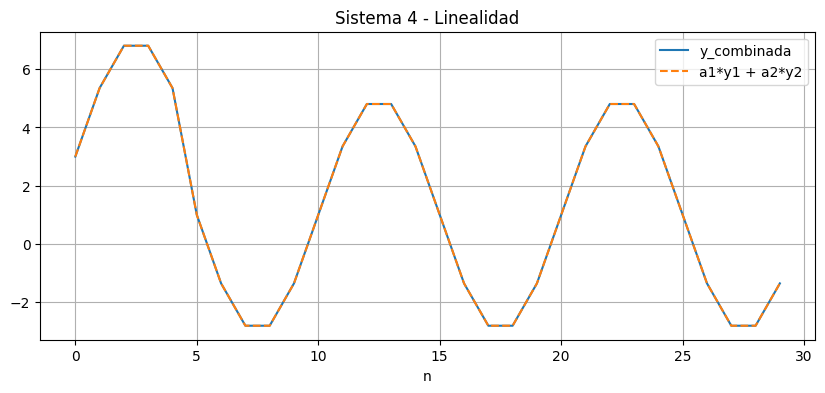

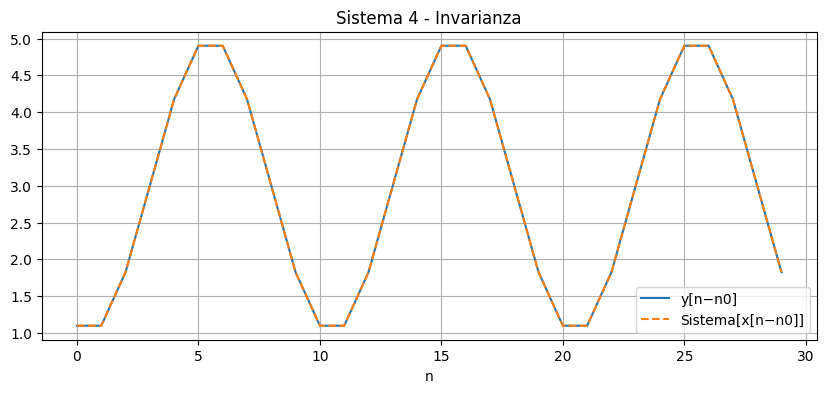

In [6]:
def sistema4(x, A=2, B=3):
    return A * x + B

# Verificación de linealidad
y1_4 = sistema4(x1)
y2_4 = sistema4(x2)
y_comb_4 = sistema4(x_comb)
y_lin_4 = a1*y1_4 + a2*y2_4
graficar(n, y_comb_4, y_lin_4, "Sistema 4 - Linealidad")

# Verificación de invarianza
x_shift = np.roll(x1, n0)
y_orig = sistema4(x1)
y_shift = sistema4(x_shift)
graficar(n, np.roll(y_orig, n0), y_shift, "Sistema 4 - Invarianza", "y[n−n0]", "Sistema[x[n−n0]]")


Es SLIT, ya que segun las graficas se ve que es lineal y ademas invariable en el tiempo

**Pregunta 4:**
Hallar la salida $y[n]$ de un SLIT ante la entrada
$x[n]=(−15, 5,−3†, 0, 5, 7,−1)$, con respuesta al impulso
$h[n]=(1,−2, 0†, 1,−2)$, donde n∈{0,±1,±2, . . . ,±N} y
n=0 para $x[n]†$. Nota: Utilizar metodo grafico para encontrar
la salida y comprobar con simulación en Python. Ver
cuaderno Convolución discreta. Repita el proceso para el sistema
con respuesta al escalón {−1, 6,−10, 3†, 1,−10, 2, 5}

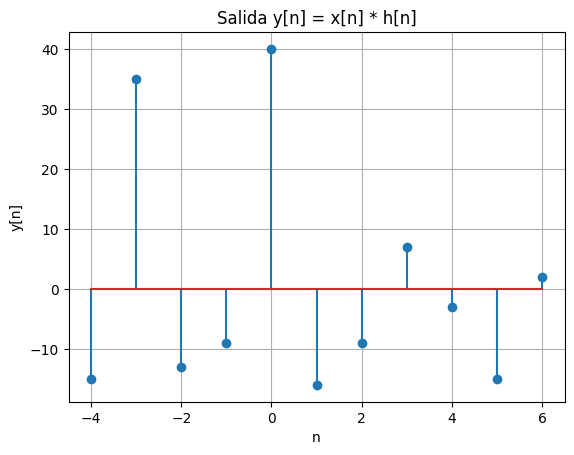

y[-4] = -15
y[-3] = 35
y[-2] = -13
y[-1] = -9
y[0] = 40
y[1] = -16
y[2] = -9
y[3] = 7
y[4] = -3
y[5] = -15
y[6] = 2


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada x[n] con n=0 en la tercera posición
x1 = np.array([-15, 5, -3, 0, 5, 7, -1])
h = np.array([1, -2, 0, 1, -2])

# Índices: centramos n=0 donde corresponde
nx = np.arange(-2, 5)  # x[-2] hasta x[4]
nh = np.arange(-2, 3)  # h[-2] hasta h[2]

# Convolución
y = np.convolve(x1, h)
ny = np.arange(nx[0] + nh[0], nx[-1] + nh[-1] + 1)

# Gráfica
plt.stem(ny, y)
plt.title("Salida y[n] = x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

# Mostrar resultados numéricos
for n_val, y_val in zip(ny, y):
    print(f"y[{n_val}] = {y_val}")


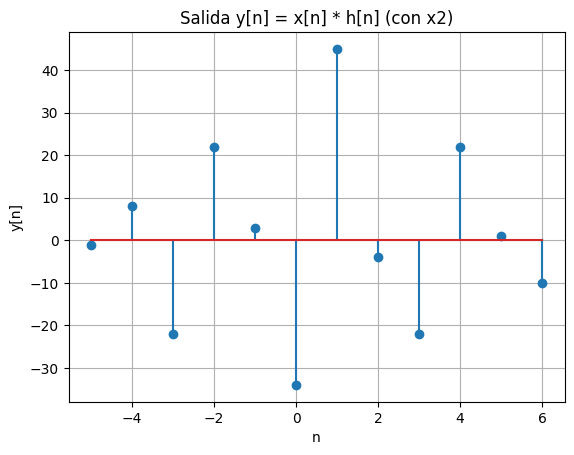

Resultados de la convolución de x2 y h:
y[-5] = -1
y[-4] = 8
y[-3] = -22
y[-2] = 22
y[-1] = 3
y[0] = -34
y[1] = 45
y[2] = -4
y[3] = -22
y[4] = 22
y[5] = 1
y[6] = -10


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada x[n] con n=0 en la cuarta posición (el valor 3)
x2 = np.array([-1, 6, -10, 3, 1, -10, 2, 5]) # Length 8
h = np.array([1, -2, 0, 1, -2]) # Length 5

# Índices: centramos n=0 donde corresponde
# Para x2, si 3 (índice 3) es n=0, los índices van de -3 a 4
nx = np.arange(-(np.where(x2 == 3)[0][0]), len(x2) - np.where(x2 == 3)[0][0])
# Para h, si 0 (índice 2) es n=0, los índices van de -2 a 2
nh = np.arange(-(np.where(h == 0)[0][0]), len(h) - np.where(h == 0)[0][0])

# Convolución
y2 = np.convolve(x2, h) # Length 8 + 5 - 1 = 12

# Índices de la salida y2
# Rango de la convolución: del inicio de x2 + inicio de h, al fin de x2 + fin de h
ny2_start = nx[0] + nh[0]
ny2_end = nx[-1] + nh[-1]
ny2 = np.arange(ny2_start, ny2_end + 1) # Length should be len(y2)

# Gráfica
plt.stem(ny2, y2)
plt.title("Salida y[n] = x[n] * h[n] (con x2)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

# Mostrar resultados numéricos
print("Resultados de la convolución de x2 y h:")
for n_val, y_val in zip(ny2, y2):
    print(f"y[{n_val}] = {y_val}")